# 一、小波分解的用法
## 1.1 工具包使用

- 安装

关于 `PyWavelets` 的更多用法，请查阅其官方文档：[link](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families)及 [pyWavelets使用笔记](https://www.docin.com/p-74261596.html)。

In [1]:
!pip install PyWavelets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


- import module

In [2]:
import pywt 
print(pywt.families()) # 打印出小波族
print(pywt.families(short=False))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


- haar: Haar
- db: Daubechies
- sym: Symlets
- coif: Coiflets
- bior: Biorthogonal
- rbio: Reverse biorthogonal
- dmey: "discrete: Fir approximation of Meyer wavelet
- gaus: Gaussian wavelets
- mexh: Mexican hat wavelet
- morl: Morlet wavelet
- cgau: Complex Gaussian wavelets
- shan: Shannon wavelets
- fbsp: Frequency B-Spline wavelets
- cmor: Complex Morlet wavelets

- 显示小波族中包含的小波名称

In [3]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


- 小波对象

In [4]:
help(pywt.Wavelet)

Help on class Wavelet in module pywt._extensions._pywt:

class Wavelet(builtins.object)
 |  Wavelet(name, filter_bank=None) object describe properties of
 |  a wavelet identified by name.
 |  
 |  In order to use a built-in wavelet the parameter name must be
 |  a valid name from the wavelist() list.
 |  To create a custom wavelet object, filter_bank parameter must
 |  be specified. It can be either a list of four filters or an object
 |  that a `filter_bank` attribute which returns a list of four
 |  filters - just like the Wavelet instance itself.
 |  
 |  Methods defined here:
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  get_filters_coeffs(...)
 |  
 |  get_reverse_filters_coeffs(...)
 |  
 |  wavefun(...)
 |      wavefun(self, level=8)
 |      
 |      Calculates approximations of scaling function (`phi`) and w

参数说明：`name`: 小波名称；`filter_bank`: 使用提供的滤波器组。示例：

In [5]:
wavelet = pywt.Wavelet('db8')
print(wavelet)

Wavelet db8
  Family name:    Daubechies
  Short name:     db
  Filters length: 16
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


- Haar (haar)

Haar函数是小波分析中最早用到的一个具有紧支撑的正交小波函数，也是最简单的一个小波函数，它是支撑域在 $t \in [0,1]$ 范围内的单个矩形波。`Haar` 小波在时域上是不连续的，所以作为基本小波性能不是特别好。

- Daubechies (db)

多贝西小波小波函数 $\Psi(\mathrm{t})$ 和尺度函数 $\phi(t)$ 中的支撑区为 $2 N − 1$，$\Psi(\mathrm{t})$ 的消失矩为 $N$。$\mathrm{db} N$ 小波具有较好的正则性，即该小波作为稀疏基所引入的光滑误差不容易被察觉，使得信号重构过程比较光滑。$\mathrm{db}$ N 小波的特点是随着阶次（序列N）的增大消失矩阶数越大，其中消失矩越高光滑性就越好，频域的局部化能力就越强，频带的划分效果越好，但是会使时域紧支撑性减弱，同时计算量大大增加，实时性变差。另外，除 $N=1$ 外，$\mathrm{db} N$ 小波不具有对称性（即非线性相位），即在对信号进行分析和重构时会产生一定的相位失真。$\mathrm{db} N$ 没有明确的表达式（除了 $N=1$ 外，$N=1$ 时即为 `Haar` 小波）

Ref：[Python 离散小波变换（DWT） pywt库]（https://blog.csdn.net/wsp_1138886114/article/details/116780542）

```python
# Filters length: 6        #滤波器长度
# Orthogonal:     True    #正交
# Biorthogonal:   True    #双正交
# Symmetry:       asymmetric    #对称性，不对称
# DWT:            True    #离散小波变换
# CWT:            False    #连续小波变换
```

In [6]:
def print_array(arr):
    print('[%s]'%','.join(['%.14f'%x for x in arr]))
    
#离散小波变换的小波滤波系数
# dec_lo Decomposition filter values 分解滤波值， rec 重构滤波值
#db3.filter_bank 返回4 个属性
print(wavelet.filter_bank == (wavelet.dec_lo, wavelet.dec_hi, wavelet.rec_lo, wavelet.rec_hi))  #True
print(wavelet.dec_len) 
print(wavelet.rec_len)  #16 

True
16
16


# 二、实战篇：基于小波分解与支持向量机的股票预测
## 2.1 获取数据

接下来，我们借助 `tushare` 工具包获取股票数据，并使用小波分解进行实战演练。关于 `tushare` 的具体用法，请查阅 [官方文档](http://tushare.org/classifying.html#id8)。

**注**： 此处需要在 tushare 官网申请一个账号，然后得到 token 后，赋值传给 `ts_token` 才能通过数据接口获取数据。

In [7]:
ts_token = ''

这里是用 000001 平安银行为例，下载从 `2015-1-1` 到最近某一天的股价数据

In [8]:
import datetime
import tushare as ts

ts.set_token(ts_token) 
pro = ts.pro_api()

time_temp = datetime.datetime.now() - datetime.timedelta(days=1)
end_dt = time_temp.strftime('%Y%m%d')

In [9]:
df = ts.pro_bar(ts_code='000001.SZ', start_date='20150101', end_date=end_dt, freq='D')

#把数据按时间调转顺序，最新的放后面，从 tushare 下载的数据是最新的在前面，为了后面准备 X,y 数据方便
df = df.iloc[::-1]
df.reset_index(inplace=True)

df.head() #用 df.head() 可以查看一下下载下来的股票价格数据，显示数据如下：

,index,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2077,000001.SZ,20150105,15.99,16.28,15.60,16.02,15.84,0.18,1.14,2860436.43,4.565388e+06
1,2076,000001.SZ,20150106,15.85,16.39,15.55,15.78,16.02,-0.24,-1.50,2166421.40,3.453446e+06
2,2075,000001.SZ,20150107,15.56,15.83,15.30,15.48,15.78,-0.30,-1.90,1700120.67,2.634796e+06
3,2074,000001.SZ,20150108,15.50,15.57,14.90,14.96,15.48,-0.52,-3.36,1407714.21,2.128003e+06
4,2073,000001.SZ,20150109,14.90,15.87,14.71,15.08,14.96,0.12,0.80,2508500.23,3.835378e+06


只用数据里面的收盘价字段的数据，也可以测试用更多价格字段作为预测输入数据

(2078, 1)


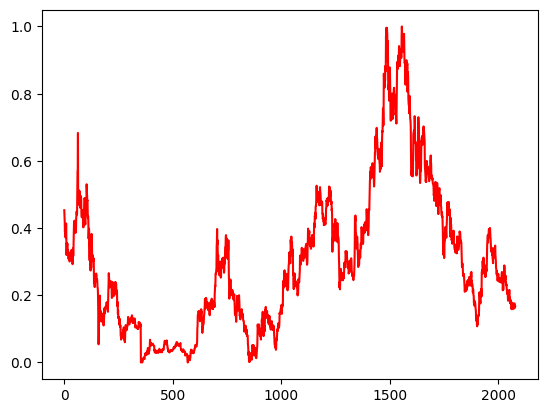

In [10]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#只用数据里面的收盘价字段的数据，也可以测试用更多价格字段作为预测输入数据
data_set = df.loc[:, ['close']]
#只取价格数据，不要表头等内容
data_set = data_set.values
# #对数据做规则化处理，都按比例转成 0 到 1 之间的数据，这是为了避免真实数据过大或过小影响模型判断
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(data_set)
 
print(data_set_scaled.shape)
 
plt.figure()
plt.plot(data_set_scaled,"r-")

## 2.2 使用小波分解降噪

(31,)
8
(2078,)


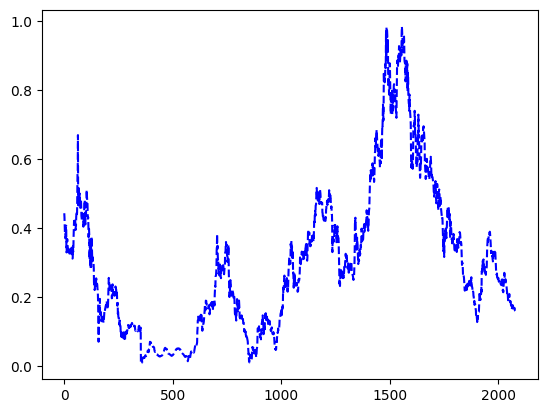

In [11]:
import pywt 
import numpy as np

#小波去噪处理
data_set_scaled=data_set_scaled.reshape(-1)
 
w = pywt.Wavelet('db8')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data_set_scaled), w.dec_len)
threshold = 0.05  # Threshold for filtering
 
coeffs = pywt.wavedec(data_set_scaled, 'db8', level=maxlev)  # 将信号进行小波分解
print(coeffs[0].shape)
print(len(coeffs))
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波
    
data_set_scaled_wv = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
 
plt.plot(data_set_scaled_wv,"b--")
 
data_set_scaled_wv = np.array(data_set_scaled_wv)
# training_set_scaled=training_set_scaled.reshape(-1,1)
print(data_set_scaled_wv.shape)

## 2.3 构建训练样本集
- 准备 X 和 y 数据

就类似前面解释的，先用最近一个交易日的收盘价作为第一个 y，然后这个交易日以前的 30 个交易日（滞后阶数 lag 为30）的收盘价作为 X。
这样依次往前推，例如最近第二个收盘价是第二个 y，而最新第二个收盘价以前的 30 个交易日收盘价作为第二个 X，依次往前准备出大量的 X 和 y，用于后面的训练。

**注**： 此处针对 `X` 和 `y` 的处理略有不同，X 选择的是小波分解重构之后的数据，而 `y` 则选择的没有进行小波分解重构的数据

In [12]:
X_data = []
y_data = []
lags = 30

for i in range(lags, len(data_set_scaled)):
    X_data.append(data_set_scaled_wv[i-lags:i])
    y_data.append(data_set_scaled[i])

X_data, y_data = np.array(X_data), np.array(y_data)

# X_train=X_train.reshape(-1,1,devia)
print(X_data.shape)
print(y_data.shape) 

(2048, 30)
(2048,)


- 分割数据集

在实际操作中，通常会对数据进行分割，得到训练数据集和测试数据集，常用的分割比例为 7/3，8/2。此外，在科研论文中，通常会设置多个不同的分割比例来确保实证结果的稳健型。此处，为方便起见，我们选择 2022年前的数据作为训练集，2022年之后的数据作为测试集。

In [13]:
split_date = '20211231'
train_length = df[df['trade_date']== split_date].index.values - lags
X_train = X_data[:train_length[0], :]
y_train = y_data[:train_length[0]]
X_test = X_data[train_length[0]:, :]
y_test = y_data[train_length[0]:]

X_train.shape, X_test.shape

((1674, 30), (374, 30))

## 2.4 构建模型与评价指标
- 选择评价指标

此处，选择 `MSE` 和 `MAE` 两个常见的评价指标来进行评价。

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Calculating directional accuracy
def direct_accuracy(real_Y, pred_Y):
    # Turn numpy into pandas to difference the series
    temp_real = pd.DataFrame(real_Y)
    
    pd_real = temp_real.diff().dropna() # Difference
    
    temp_pred = pred_Y[1:]-real_Y[:-1]
    pd_pred = pd.DataFrame(temp_pred)
    
    # Set the value to 1 if the changes of series is positive
    
    real_direct = np.ones(len(pd_real)) # Default value is set to 1
    pred_direct = np.ones(len(pd_pred))
    
    # Change the value to -1 if the changes is negative
    row, col = np.where(pd_real<0)
    real_direct[row] = -1 
    
    row, col = np.where(pd_pred<0)
    pred_direct[row] = -1
    
    return accuracy_score(real_direct, pred_direct)

def cal_metrics(pred, real, mean_name):
    metric = np.array(['Means', 'MSE', 'MAE'])
    mse = mean_squared_error(real, pred).round(4)
    mae = mean_absolute_error(real, pred).round(4)
    metric = np.vstack((metric, [mean_name, mse, mae]))
    return metric

In [15]:
from sklearn.svm import LinearSVR

from sklearn.pipeline import make_pipeline

regr = make_pipeline(LinearSVR(random_state=2023, max_iter=1000))

regr.fit(X_train, y_train)

pred_train=regr.predict(X_train)
pred_test=regr.predict(X_test)

/Users/yangsu/miniconda3/envs/whalequant/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/yangsu/miniconda3/envs/whalequant/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.5 预测结果与评价值
- 绘制样本外预测值与真实值对比图

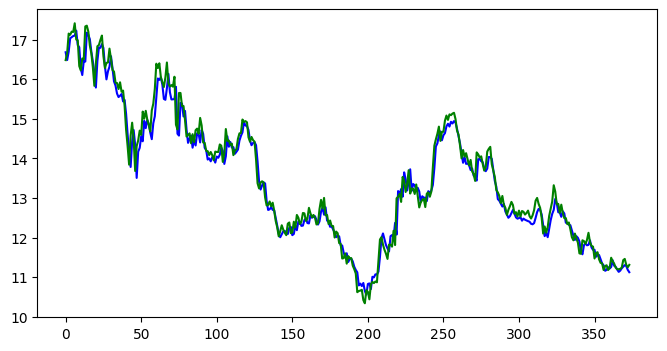

In [16]:
price_pred_test = sc.inverse_transform(pred_test.reshape(-1, 1))
price_real_test = sc.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(8, 4))
plt.plot(price_pred_test,"b-")
plt.plot(price_real_test,"g-")
 
plt.show()

In [17]:
metric_train = cal_metrics(pred_train, y_train, 'Train_set')
metric_test = cal_metrics(pred_test, y_test, 'Test_set')
metric_train, metric_test

(array([['Means', 'MSE', 'MAE'],
        ['Train_set', '0.0004', '0.0133']], dtype='<U32'),
 array([['Means', 'MSE', 'MAE'],
        ['Test_set', '0.0003', '0.012']], dtype='<U32'))

## 2.6 完整代码：

[['Means' 'MSE' 'MAE']
 ['Train_set' '0.0004' '0.0133']] [['Means' 'MSE' 'MAE']
 ['Test_set' '0.0003' '0.012']]


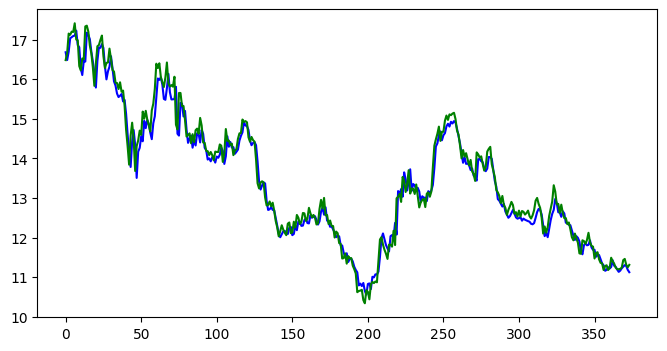

In [19]:
import pywt 
import numpy as np
import datetime
import tushare as ts
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline


import warnings 
warnings.filterwarnings('ignore')


# Calculating directional accuracy
def direct_accuracy(real_Y, pred_Y):
    # Turn numpy into pandas to difference the series
    temp_real = pd.DataFrame(real_Y)
    
    pd_real = temp_real.diff().dropna() # Difference
    
    temp_pred = pred_Y[1:]-real_Y[:-1]
    pd_pred = pd.DataFrame(temp_pred)
    
    # Set the value to 1 if the changes of series is positive
    
    real_direct = np.ones(len(pd_real)) # Default value is set to 1
    pred_direct = np.ones(len(pd_pred))
    
    # Change the value to -1 if the changes is negative
    row, col = np.where(pd_real<0)
    real_direct[row] = -1 
    
    row, col = np.where(pd_pred<0)
    pred_direct[row] = -1
    
    return accuracy_score(real_direct, pred_direct)

def cal_metrics(pred, real, mean_name):
    metric = np.array(['Means', 'MSE', 'MAE'])
    mse = mean_squared_error(real, pred).round(4)
    mae = mean_absolute_error(real, pred).round(4)
    metric = np.vstack((metric, [mean_name, mse, mae]))
    return metric


# ts_token = ''
ts.set_token(ts_token) #需要在 tushare 官网申请一个账号，然后得到 token 后才能通过数据接口获取数据
pro = ts.pro_api()

time_temp = datetime.datetime.now() - datetime.timedelta(days=1)
end_dt = time_temp.strftime('%Y%m%d')

df = ts.pro_bar(ts_code='000001.SZ', start_date='20150101', end_date=end_dt, freq='D')

#把数据按时间调转顺序，最新的放后面，从 tushare 下载的数据是最新的在前面，为了后面准备 X,y 数据方便
df = df.iloc[::-1]
df.reset_index(inplace=True)

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#只用数据里面的收盘价字段的数据，也可以测试用更多价格字段作为预测输入数据
data_set = df.loc[:, ['close']]
#只取价格数据，不要表头等内容
data_set = data_set.values
# #对数据做规则化处理，都按比例转成 0 到 1 之间的数据，这是为了避免真实数据过大或过小影响模型判断
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(data_set)


#小波去噪处理
data_set_scaled=data_set_scaled.reshape(-1)
 
w = pywt.Wavelet('db8')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data_set_scaled), w.dec_len)
threshold = 0.05  # Threshold for filtering
 
coeffs = pywt.wavedec(data_set_scaled, 'db8', level=maxlev)  # 将信号进行小波分解
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波
    
data_set_scaled_wv = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
 
data_set_scaled_wv = np.array(data_set_scaled_wv)

X_data = []
y_data = []
lags = 30

for i in range(lags, len(data_set_scaled)):
    X_data.append(data_set_scaled_wv[i-lags:i])
    y_data.append(data_set_scaled[i])

X_data, y_data = np.array(X_data), np.array(y_data)

split_date = '20211231'
train_length = df[df['trade_date']== split_date].index.values - lags
X_train = X_data[:train_length[0], :]
y_train = y_data[:train_length[0]]
X_test = X_data[train_length[0]:, :]
y_test = y_data[train_length[0]:]


## 构建线性支持向量机模型
regr = make_pipeline(LinearSVR(random_state=2023, max_iter=1000))

regr.fit(X_train, y_train)

pred_train=regr.predict(X_train)
pred_test=regr.predict(X_test)

metric_train = cal_metrics(pred_train, y_train, 'Train_set')
metric_test = cal_metrics(pred_test, y_test, 'Test_set')
print(metric_train, metric_test)

price_pred_test = sc.inverse_transform(pred_test.reshape(-1, 1))
price_real_test = sc.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(8, 4))
plt.plot(price_pred_test,"b-")
plt.plot(price_real_test,"g-")
 
plt.show()

---
# Reference:

1. [Python中 pywt 小波分析库中的一些基本使用方法](https://www.jianshu.com/p/f3907c76362f)
2. [PyWavelets](https://pywavelets.readthedocs.io/en/latest/index.html#)
3. [形象易懂讲解算法I——小波变换](https://zhuanlan.zhihu.com/p/22450818)
4. [小波分析要点](https://mp.weixin.qq.com/s/O42x0dhIcJJdalq8qJFWyA)
5. [Pytorch实现的小波去噪优化后的LSTM股票预测算法](https://blog.csdn.net/qq_43344047/article/details/118607710)